# Exercise 3:

Use and experience methods from previous lessons with given data. Try to search for other pandas methods to analyze the data such as `groupby()` and `query()`. Write functions for repetitive tasks.

TODOs:
- See the spread of pandemic in different countries.
- Plot graphs for Reproduction Rate for different countries side by side or in the same graph.
- Check correlation between deaths and recoveries.
- Compare recoveries between countries.
- Are there any outliers (anomalies)?

[Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
base_url = "C:/Users/gizem/Desktop/Data Science Academy/data/covid/"
confirmed_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"

In [25]:
def preprocess_df(df):
    df = df.drop(columns=["Lat", "Long"])
    df = df.groupby("Country/Region").sum()
    df = df.T
    df.index = pd.to_datetime(df.index)
    return df


In [26]:
confirmed_df = pd.read_csv(confirmed_dataset_url)
recovered_df = pd.read_csv(recovered_dataset_url)
deaths_df = pd.read_csv(deaths_dataset_url)


In [27]:
def preprocess_df(df):
    df = df.drop(columns=["Lat", "Long", "Province/State"], errors="ignore")
    df = df.groupby("Country/Region").sum()
    df = df.T
    df.index = pd.to_datetime(df.index, format="%m/%d/%y")
    return df

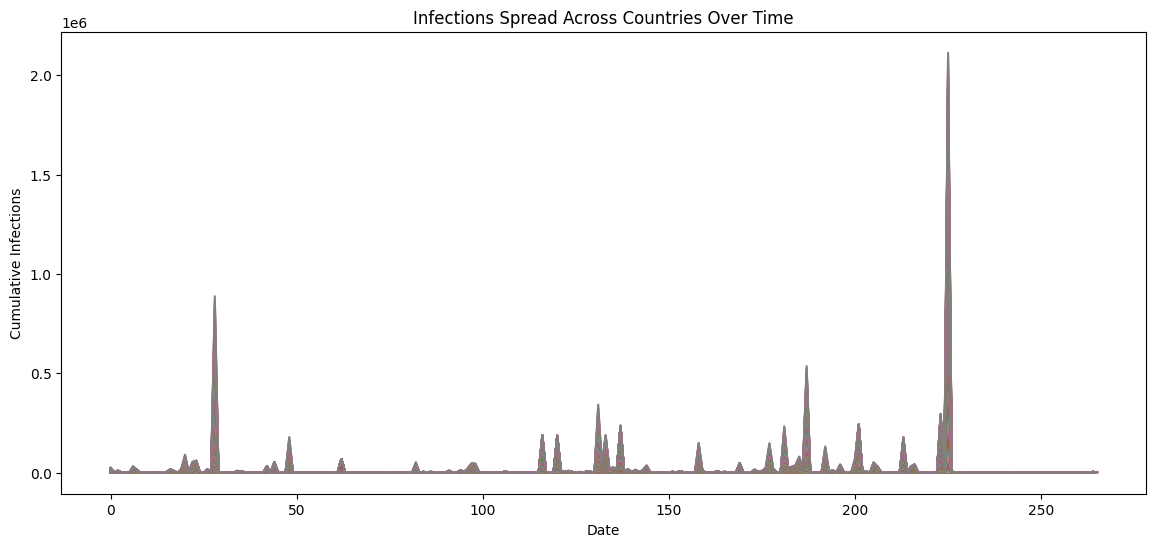

In [28]:
confirmed_df.plot(figsize=(14, 6), legend=False)
plt.title("Infections Spread Across Countries Over Time")
plt.ylabel("Cumulative Infections")
plt.xlabel("Date")
plt.show()


In [29]:
def reproduction_rate(df):
    df = df.apply(pd.to_numeric, errors='coerce')  # stringleri sayıya çevir, hatalıları NaN yap
    return df.pct_change(fill_method=None).fillna(0)  # fill_method=None uyarıyı kaldırır

In [30]:
print(confirmed_df.columns)


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20',
       '6/13/20', '6/14/20', '6/15/20'],
      dtype='object', length=150)


In [31]:
def preprocess_df(df):
    df = df.drop(["Lat", "Long", "Province/State"], axis=1, errors='ignore')  # gereksiz kolonları at
    df = df.groupby("Country/Region").sum()  # ülkeye göre grupla
    df = df.T  # tarihler index olsun
    df.index = pd.to_datetime(df.index, errors='coerce')  # index'i tarih yap
    return df


In [32]:
confirmed = preprocess_df(confirmed_df)
repro_rate = reproduction_rate(confirmed)

print(confirmed.columns)  # sütunlar ülke adı mı kontrol et

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=188)


C:\Users\gizem\AppData\Local\Temp\ipykernel_26440\2006245306.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, errors='coerce')  # index'i tarih yap


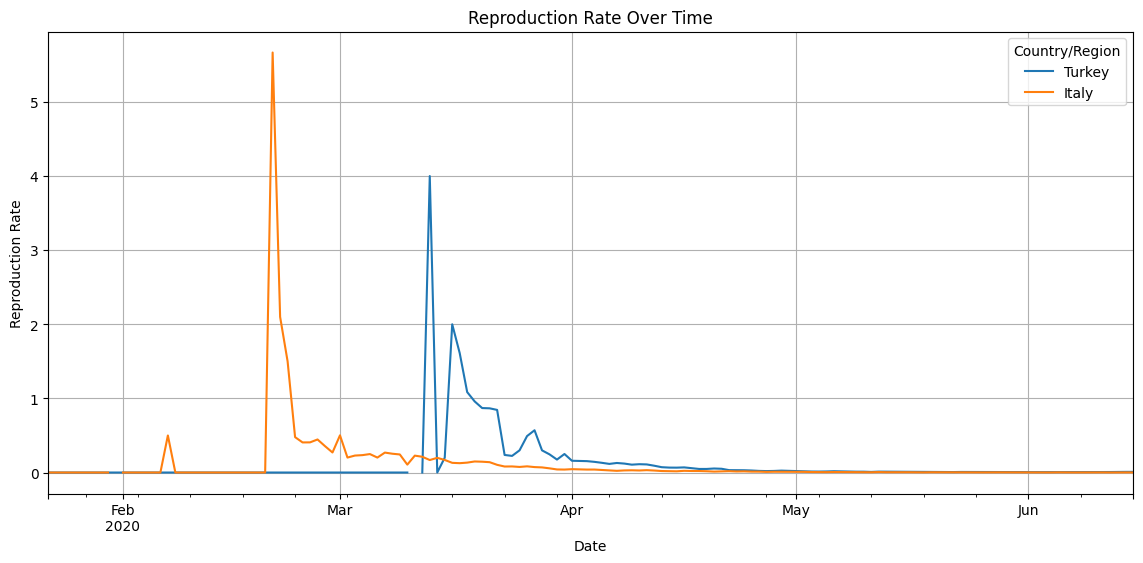

In [33]:
repro_rate = reproduction_rate(confirmed)

# testing
repro_rate[["Turkey", "Italy"]].plot(figsize=(14, 6))
plt.title("Reproduction Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Reproduction Rate")
plt.grid(True)
plt.show()


In [ ]:

latest_deaths = deaths_df.iloc[-1].drop(labels=["Province/State", "Country/Region", "Lat", "Long"], errors="ignore")
latest_recovered = recovered_df.iloc[-1].drop(labels=["Province/State", "Country/Region", "Lat", "Long"], errors="ignore")

latest_deaths = pd.to_numeric(latest_deaths, errors='coerce')
latest_recovered = pd.to_numeric(latest_recovered, errors='coerce')

correlation = latest_deaths.corr(latest_recovered)
print("Correlation between deaths and recoveries: ", correlation)


Correlation between deaths and recoveries:  nan


c:\Python\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Python\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between deaths and recoveries:  0.4736413939469144


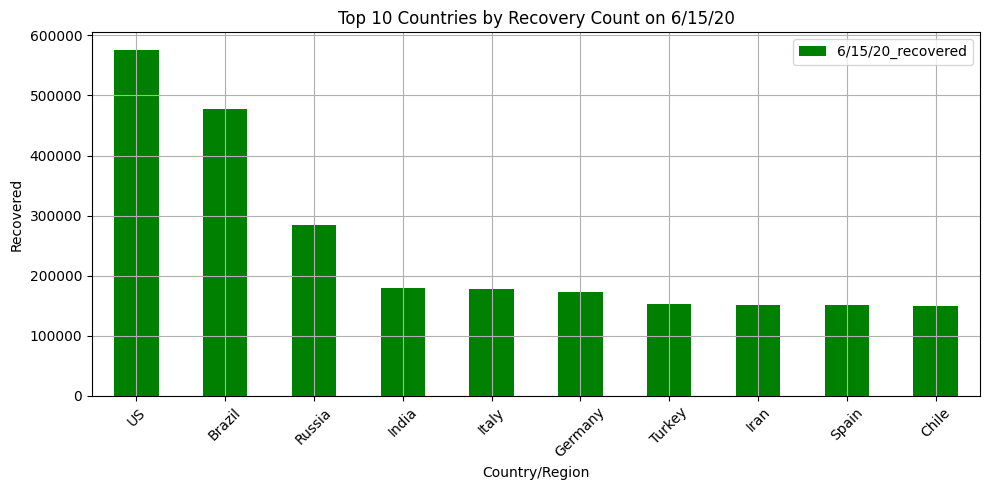

In [35]:
# En son tarihli sütunu al (örneğin "5/28/25")
latest_date = deaths_df.columns[-1]
latest_deaths = deaths_df[["Country/Region", latest_date]]
latest_recovered = recovered_df[["Country/Region", latest_date]]

# Aynı ülke adlarını eşleştir
merged = pd.merge(
    latest_deaths,
    latest_recovered,
    on="Country/Region",
    suffixes=("_deaths", "_recovered")
)

# Sayısal verilere dönüştür
merged[latest_date + "_deaths"] = pd.to_numeric(merged[latest_date + "_deaths"], errors="coerce")
merged[latest_date + "_recovered"] = pd.to_numeric(merged[latest_date + "_recovered"], errors="coerce")

# Korelasyonu hesapla
correlation = merged[latest_date + "_deaths"].corr(merged[latest_date + "_recovered"])
print("Correlation between deaths and recoveries: ", correlation)

# En çok iyileşen ülkeleri görselleştir
top_countries = merged.sort_values(by=latest_date + "_recovered", ascending=False).head(10)

top_countries.plot(
    x="Country/Region",
    y=latest_date + "_recovered",
    kind="bar",
    figsize=(10, 5),
    color="green"
)
plt.title(f"Top 10 Countries by Recovery Count on {latest_date}")
plt.ylabel("Recovered")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
# En son tarihli sütunu al
latest_date = recovered_df.columns[-1]

# Ülke adlarını ve en son iyileşme sayılarını içeren DataFrame oluştur
latest_recovered = recovered_df[["Country/Region", latest_date]].copy()

# Sayısal değere dönüştür
latest_recovered[latest_date] = pd.to_numeric(latest_recovered[latest_date], errors="coerce")

# Z-score hesapla
latest_recovered["z_score"] = zscore(latest_recovered[latest_date].fillna(0))

# Aykırı ülkeleri bul (z > 3 veya z < -3)
outliers = latest_recovered[
    (latest_recovered["z_score"] > 3) | (latest_recovered["z_score"] < -3)
]

# Sonuçları göster
print("Outlier Countries in Recoveries:")
print(outliers[["Country/Region", latest_date, "z_score"]])


Outlier Countries in Recoveries:
    Country/Region  6/15/20   z_score
29          Brazil   477709  8.061203
184         Russia   284021  4.685020
225             US   576334  9.780339


In [ ]:
# En fazla iyileşen 5 ülke (query ile)
top_recovered = recovered_df.groupby("Country/Region").sum().drop(columns=["Lat", "Long"])
top_recovered = top_recovered.query("`4/30/20` > 50000")  # örnek tarih

print(top_recovered.head())


                                                   Province/State  1/22/20  \
Country/Region                                                               
China           AnhuiBeijingChongqingFujianGansuGuangdongGuang...       28   
Germany                                                         0        0   
Iran                                                            0        0   
Italy                                                           0        0   
Spain                                                           0        0   

                1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
Country/Region                                                                  
China                30       36       39       49       58      101      120   
Germany               0        0        0        0        0        0        0   
Iran                  0        0        0        0        0        0        0   
Italy                 0        0        0       

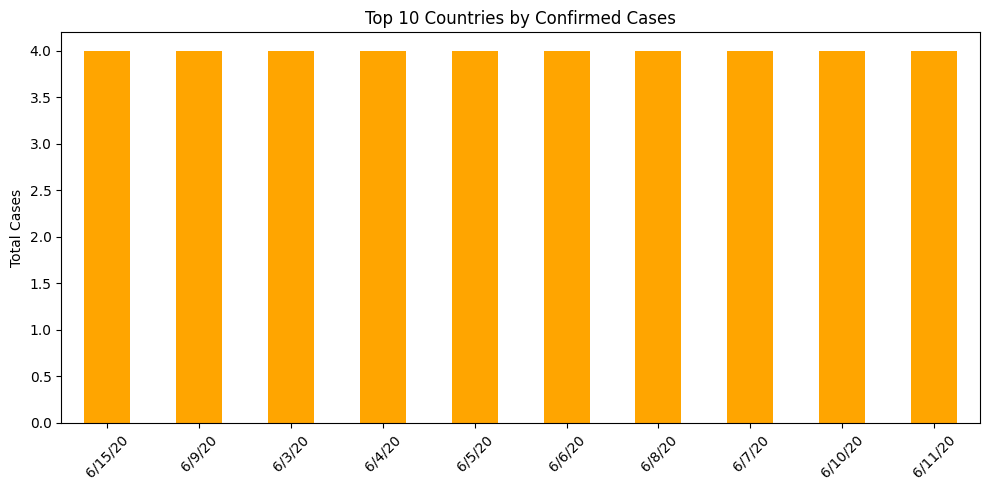

In [38]:
# Örnek: Toplam vaka sayıları ülkelere göre
latest_confirmed = confirmed_df.iloc[-1]
latest_confirmed = latest_confirmed.drop(labels=["Province/State", "Country/Region", "Lat", "Long"], errors="ignore")
latest_confirmed = pd.to_numeric(latest_confirmed, errors="coerce").sort_values(ascending=False)

top10_confirmed = latest_confirmed.head(10)

top10_confirmed.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Top 10 Countries by Confirmed Cases")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\gizem\AppData\Local\Temp\ipykernel_26440\2261833476.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_df_transposed.index = pd.to_datetime(confirmed_df_transposed.index)


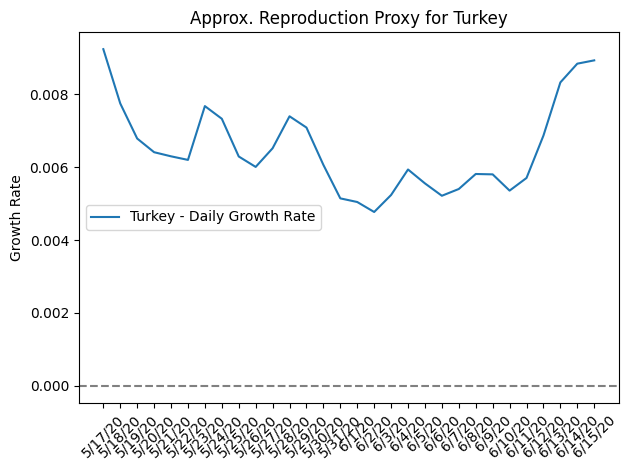

In [39]:
# Günlük büyüme oranı ile approx R değeri türet
confirmed_df_transposed = confirmed_df.drop(columns=["Province/State", "Country/Region", "Lat", "Long"], errors="ignore").T
confirmed_df_transposed.index = pd.to_datetime(confirmed_df_transposed.index)

# Türkiye örneği (veya başka ülke)
country = 'Turkey'
country_data = confirmed_df[confirmed_df["Country/Region"] == country].drop(columns=["Province/State", "Country/Region", "Lat", "Long"], errors="ignore").sum()
daily_growth = country_data.pct_change().fillna(0)

plt.plot(daily_growth[-30:], label=f"{country} - Daily Growth Rate")
plt.axhline(0, linestyle='--', color='gray')
plt.title(f"Approx. Reproduction Proxy for {country}")
plt.ylabel("Growth Rate")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
